In [64]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, optimize, stats
from astropy.io import ascii
from astropy.table import Table, vstack
from scipy.stats import chisquare as Xsq
import pandas as pd
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)


def decay_stats_plot(xvals,yvals,yerrvals,maskvals,Aguess,bguess,cguess,title):
    # Adjust for initial point of y offset
    #for j in range(len(yvals)):
    #    yvals[j] += y_offset
    
    mask = [True for y in ys]
    for maskval in maskvals:
        mask[maskval] = False
    
    yvals = np.array([yvals[i] for i in range(len(mask)) if mask[i]])
    xvals = np.array([xvals[i] for i in range(len(mask)) if mask[i]])
    yerrvals = np.array([yerrvals[i] for i in range(len(mask)) if mask[i]])
    
    if 0 in np.array(yvals):
        zeroloc = int(np.where(np.array(yvals)==0)[0])
        
        for i in range(len(yvals)-zeroloc):
            yvals[i+zeroloc] = -1*yvals[i+zeroloc]
    
    print(title)
    params = optimize.curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,  xvals,  yvals,  p0=(np.log(Aguess),np.log(bguess),cguess), sigma=yerrvals)
    print(params[0])
    a, b, c = params[0]
    modelys = a*np.exp(b*xvals)+c
    print(params[1])

    Xsq = stats.chisquare(yvals,modelys)
    Xsq_manual = np.sum((yvals-modelys)**2/(yerrvals))
    #print(diff_sqs)
    num_params = len(yvals)-2
    red_Xsq = Xsq_manual/num_params
    print("Xsq manually: "+str(Xsq_manual))
    print("Reduced Xsq:"+str(red_Xsq))

    fig6=plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
    #plt.plot(xs, ys, '.', color='red');
    plt.errorbar(xvals, yvals, yerr=yerrvals, linewidth=0.5, elinewidth=0.5, capsize=5, color='red');
    plt.plot(xvals,modelys,color="blue")
    plt.title(title,fontsize=16)
    #plt.ylim(0,260)
    #plt.xlim(26,32)
    plt.xlabel(r'Delay [$\mu s$]',fontsize=16)
    plt.ylabel(r'$\Delta$ Peak Height [mV]',fontsize=16)
    

[ 2.47763300e+02 -4.66827638e-02 -1.13383629e+02]
[[ 7.43420727e+01  2.79618545e-02 -8.50585339e+01]
 [ 2.79618545e-02  1.29252854e-05 -3.60538996e-02]
 [-8.50585339e+01 -3.60538996e-02  1.04547028e+02]]


Text(0, 0.5, '$\\Delta$ Peak Height [mV]')

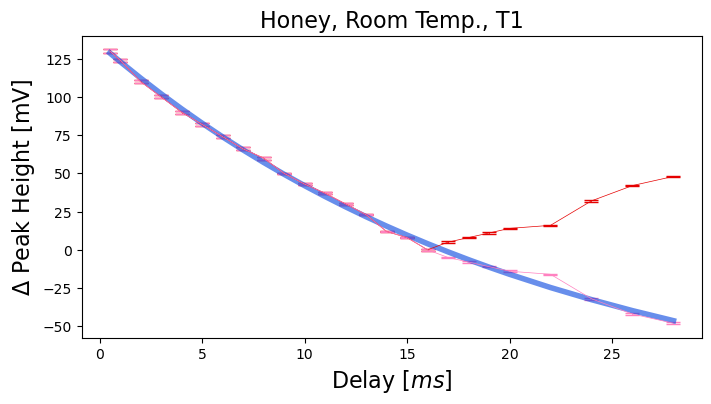

In [128]:
title = "Honey, Room Temp., T1"
ys = [130, 124, 110, 100, 90, 82, 74, 66, 60, 50, 43, 37, 30, 23, 12, 8, 0, 5, 8, 11, 14, 16, 32, 42, 48]
y2s = [130, 124, 110, 100, 90, 82, 74, 66, 60, 50, 43, 37, 30, 23, 12, 8, 0, -5, -8, -11, -14, -16, -32, -42, -48]
y_errs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
xs = np.array([500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 22000, 24000, 26000, 28000])/1000
maskvals = [21]

Aguess =254.1574125
bguess =0.9999561053
cguess =121.5
params = optimize.curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,  xs,  y2s,  p0=(np.log(Aguess),np.log(bguess),cguess), sigma=y_errs)
print(params[0])
a, b, c = params[0]
modelys = a*np.exp(b*np.array(xs))+c
print(params[1])

#decay_stats_plot(xs,ys,y_errs,maskvals,254.1574125,0.9999561053,121.5,title)

fig6b=plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
#plt.plot(xs, ys, '.', color='red')
plt.errorbar(xs, ys, yerr=y_errs, linewidth=0.5, elinewidth=0.5, capsize=5, color='xkcd:red')
plt.errorbar(xs, y2s, yerr=y_errs, linewidth=0.5, elinewidth=0.5, capsize=5, color='xkcd:pink');
plt.plot(xs, modelys, linewidth=4, color='xkcd:blue',alpha=0.6);
plt.title(title,fontsize=16)
#plt.ylim(0,260)
#plt.xlim(26,32)
plt.xlabel(r'Delay [$ms$]',fontsize=16)
plt.ylabel(r'$\Delta$ Peak Height [mV]',fontsize=16)


#--------------------------------------------------------------------------------------------#

#title = "Mineral Oil, T1"
#ys = [224.0, 216.0, 210.0, 202.0, 188.0, 176.0, 164.0, 148.0, 138.0, 126.0, 116.0, 96.0, 66.0, 48.0, 20.0, 12.0, 0.0, 11.0, 26.0, 41.0, 53.0, 68.0, 80.0, 91.0, 99.0]
#y_errs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#xs = [100, 200, 300, 500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000, 13000, 15000, 18000, 19000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000, 36000]
#maskvals = [0,1,2,3]

#decay_stats_plot(xs,ys,y_errs,maskvals,530.9736531,0.9999748861,317,title)

[130, 124, 110, 100, 90, 82, 74, 66, 60, 50, 43, 37, 30, 23, 12, 8, 0, -5, -8, -11, -14, -16, -32, -42, -48]
[128.66350448 123.07921595 112.2941732  102.001035    92.17736562
  82.80175266  73.85376031  65.31388484  57.1635121   49.38487691
  41.96102437  34.87577287  28.11367886  21.66000318  15.50067889
   9.62228066   4.01199548  -1.34240524  -6.45259237 -11.32970445
 -15.98437203 -24.66649358 -32.5746951  -39.77796346 -46.33913604]
[ 1.33649552  0.92078405 -2.2941732  -2.001035   -2.17736562 -0.80175266
  0.14623969  0.68611516  2.8364879   0.61512309  1.03897563  2.12422713
  1.88632114  1.33999682 -3.50067889 -1.62228066 -4.01199548 -3.65759476
 -1.54740763  0.32970445  1.98437203  8.66649358  0.5746951  -2.22203654
 -1.66086396]
25.018600133952013
21
1.191361911140572
2.615659914250188
2.6159726061332833
tau = -21.421182455889756
1.7873570697062888


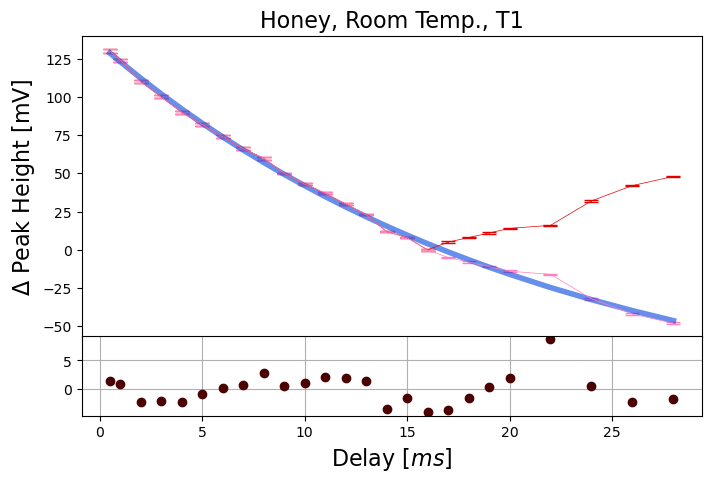

In [129]:
#sumsqs = np.sum((ys-modelys)**2/np.array(y_errs)**2)
sumsqs = (np.sum((y2s-modelys)**2)/(2.615**2))
dofs = len(y2s)-1-3
redXSq = sumsqs/dofs

print(y2s)
print(modelys)
print((y2s-modelys))
print(sumsqs)
print(dofs)

print(redXSq)
print(np.std(y2s-modelys))
ysstd = np.sqrt(np.sum((y2s-modelys)**2)/(len(ys)))
print(ysstd)
resids = y2s-modelys

tau = 1/params[0][1]
print('tau = '+str(tau))
dtau = tau-(1/(params[0][1]+np.sqrt(params[1][1][1])))
print(dtau)

fig6b=plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
#plt.plot(xs, ys, '.', color='red')
plt.errorbar(xs, ys, yerr=y_errs, linewidth=0.5, elinewidth=0.5, capsize=5, color='xkcd:red')
plt.errorbar(xs, y2s, yerr=y_errs, linewidth=0.5, elinewidth=0.5, capsize=5, color='xkcd:pink');
plt.plot(xs, modelys, linewidth=4, color='xkcd:blue',alpha=0.6);
plt.title(title,fontsize=16)
#plt.ylim(0,260)
#plt.xlim(26,32)
plt.xlabel(r'Delay [$ms$]',fontsize=16)
plt.ylabel(r'$\Delta$ Peak Height [mV]',fontsize=16)

frame2=fig6b.add_axes((0.125,-0.07,0.775,.2))
frame2.plot(xs,resids,'o',color='xkcd:dried blood',label='Polynomial residuals')
frame2.set_xlabel(r'Delay [$ms$]',fontsize=16)
frame2.grid(which="major")

In [138]:
def expo_decay(t, a, b, c):
    y = a*np.exp(b*t)+c
    return y

def fit_bootstrap(p0, datax, datay, datay_err, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: expo_decay(x,*p) - y

    # Fit first time
    pfit, perr = optimize.curve_fit(expo_decay, datax, datay, p0, sigma=datay_err, full_output=0)
    
    print("Data pfit = "+str(pfit))
    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    #print("residuals = "+str(residuals))
    sigma_res = np.std(residuals)
    #print("sigma residuals = "+str(sigma_res))

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)
    print("Data sigma error = "+str(sigma_err_total))
    
    # 500 random data sets are generated and fitted
    ps = []
    for i in range(500):
        # Index of random numbers to resample data
        rand_inxs = np.random.randint(0,len(datax)-1,len(datax))
        new_xs = datax[rand_inxs]
        new_ys = datay[rand_inxs]
        new_yerrs = datay_err[rand_inxs]
        
        # Sometimes the fit fails- you don't want that to stop the process
        try:
            randomfit, randomcov = optimize.curve_fit(expo_decay, new_xs, new_ys, p0, sigma=new_yerrs, full_output=0)
            ps.append(randomfit)
        except:
            pass
        
    ps = np.array(ps) #[[a,b,c],[a,b,c],[a,b,c]...]
    #Use the actual fit as the center values... not this mean
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 
    
    b = pfit[1]
    tau = 1/b
    db = err_pfit[1]
    dtau = db/(b**2-db**2)
    dtau2 = db/(b**2)
    
    print("Bootstrapped 1 Sigma Error:"+str(err_pfit))
    print("Tau = "+str(tau)+" ± "+str(dtau))
    print("Tau = "+str(tau)+" ± "+str(dtau2))
    
    return pfit, err_pfit, ps #pfit_bootstrap, perr_bootstrap 


def decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess):
    xs = np.array(xs)/1000
    ys = np.array(ys)
    y_errs = np.array(y_errs)
    
    if 0 in np.array(ys):
        zeroloc = int(np.where(ys==0)[0])        
        for i in range(len(ys)-zeroloc):
            ys[i+zeroloc] = -1*ys[i+zeroloc]

    pstart = (np.log(Aguess),np.log(bguess),cguess)
    pfit, perr, all_ps = fit_bootstrap(pstart, xs, ys, y_errs, expo_decay)
    #print(pfit)
    #print(perr)
    modelys = expo_decay(xs,*pfit)


    fig7, ax1 = plt.subplots(figsize=(10,4), dpi= 200, facecolor='w', edgecolor='k')
    ax1.title.set_text(title)
    for param in all_ps:
        ax1.plot(xs,expo_decay(xs,*param),linewidth=1,color="xkcd:salmon",alpha=0.05)
    ax1.plot(False,False,linewidth=5,color="xkcd:salmon",label='Bootstapped fits (each 99% transparent)')
    ax1.plot(xs,modelys,color="black",lw=0.5,label=r"Best fit line")
    ax1.scatter(xs,ys,marker='o',s=10,linestyle='-',color='black',alpha=0.5,zorder=3,label='Measured voltage')
    ax1.set_xlabel(r'Delay [$ms$]',fontsize=16)
    ax1.set_ylabel(r'$\Delta$ Peak Height [mV]',fontsize=16)
    ax1.legend(loc=3)
    
    ax2 = plt.axes([0,0,1,1])
    ip = InsetPosition(ax1, [0.55,0.55,0.4,0.4])
    ax2.set_axes_locator(ip)
    mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5')
    for param in all_ps:
        ax2.plot(xs[:5],expo_decay(xs,*param)[:5],linewidth=3,color="xkcd:salmon",alpha=0.01)
    ax2.plot(xs[:5],modelys[:5],color="black",lw=1,zorder=3)
    plt.errorbar(xs[:5], ys[:5], yerr=y_errs[:5], lw=0, elinewidth=0.5, capsize=3, color='xkcd:tangerine',zorder=5,label="Instrument Error")
    ax2.scatter(xs[:5],ys[:5],marker='o',s=40,linestyle='-',color='black',alpha=0.5,zorder=4)
    ax2.legend(loc=1)

    fig8, axs = plt.subplots(1,3, sharey=False, figsize=(16,4))
    #axs[0].title.set_text(r'$A_0$ [mV]')
    axs[0].hist(all_ps[:,0],bins=10,color="xkcd:salmon")
    axs[0].axvspan(pfit[0]-perr[0],pfit[0]+perr[0], color='xkcd:salmon',alpha=0.4,label=r"$1\sigma$ error")
    axs[0].axvline(pfit[0],ls="--", color='xkcd:black',alpha=1,label=r"Best fit")
    axs[0].set_xlabel(r'$A_0$ [mV]')
    axs[0].legend(loc=2)
    #axs[1].title.set_text(r'$b$ [$\mu s^{-1}] = \frac{1}{\tau}$')
    axs[1].hist(all_ps[:,1],bins=10,color="xkcd:lavender")
    axs[1].axvspan(pfit[1]-perr[1],pfit[1]+perr[1], color='xkcd:lavender',alpha=0.4,label=r"$1\sigma$ error")
    axs[1].axvline(pfit[1],ls="--", color='xkcd:black',alpha=1,label=r"Best fit")
    axs[1].set_xlabel(r'$b$ [$ms^{-1}$]')
    axs[1].legend(loc=2)
    
    def b2tau(x):
        return 1/(x)
    
    def tau2b(x):
        return x
    
    secax = axs[1].secondary_xaxis('top', functions=(b2tau, tau2b))
    secax.set_xlabel(r'tau [$ms$]')
    
    
    #axs[2].title.set_text(r'$c$ [mV]')
    axs[2].hist(all_ps[:,2],bins=10,color="xkcd:blood")
    axs[2].axvspan(pfit[2]-perr[2],pfit[2]+perr[2], color='xkcd:blood',alpha=0.4,label=r"$1\sigma$ error")
    axs[2].axvline(pfit[2],ls="--", color='xkcd:black',alpha=1,label=r"Best fit")
    axs[2].set_xlabel(r'$c$ [mV]')
    axs[2].legend(loc=2)
    plt.show()

Data pfit = [ 5.02008322e+02 -2.76081360e-02 -2.86007292e+02]
Data sigma error = 2.8141554720745225
Bootstrapped 1 Sigma Error:[1.67714757e+01 1.67546685e-03 1.87976348e+01]
Tau = -36.221206724116875 ± 2.206297702601052
Tau = -36.221206724116875 ± 2.1981719869450784


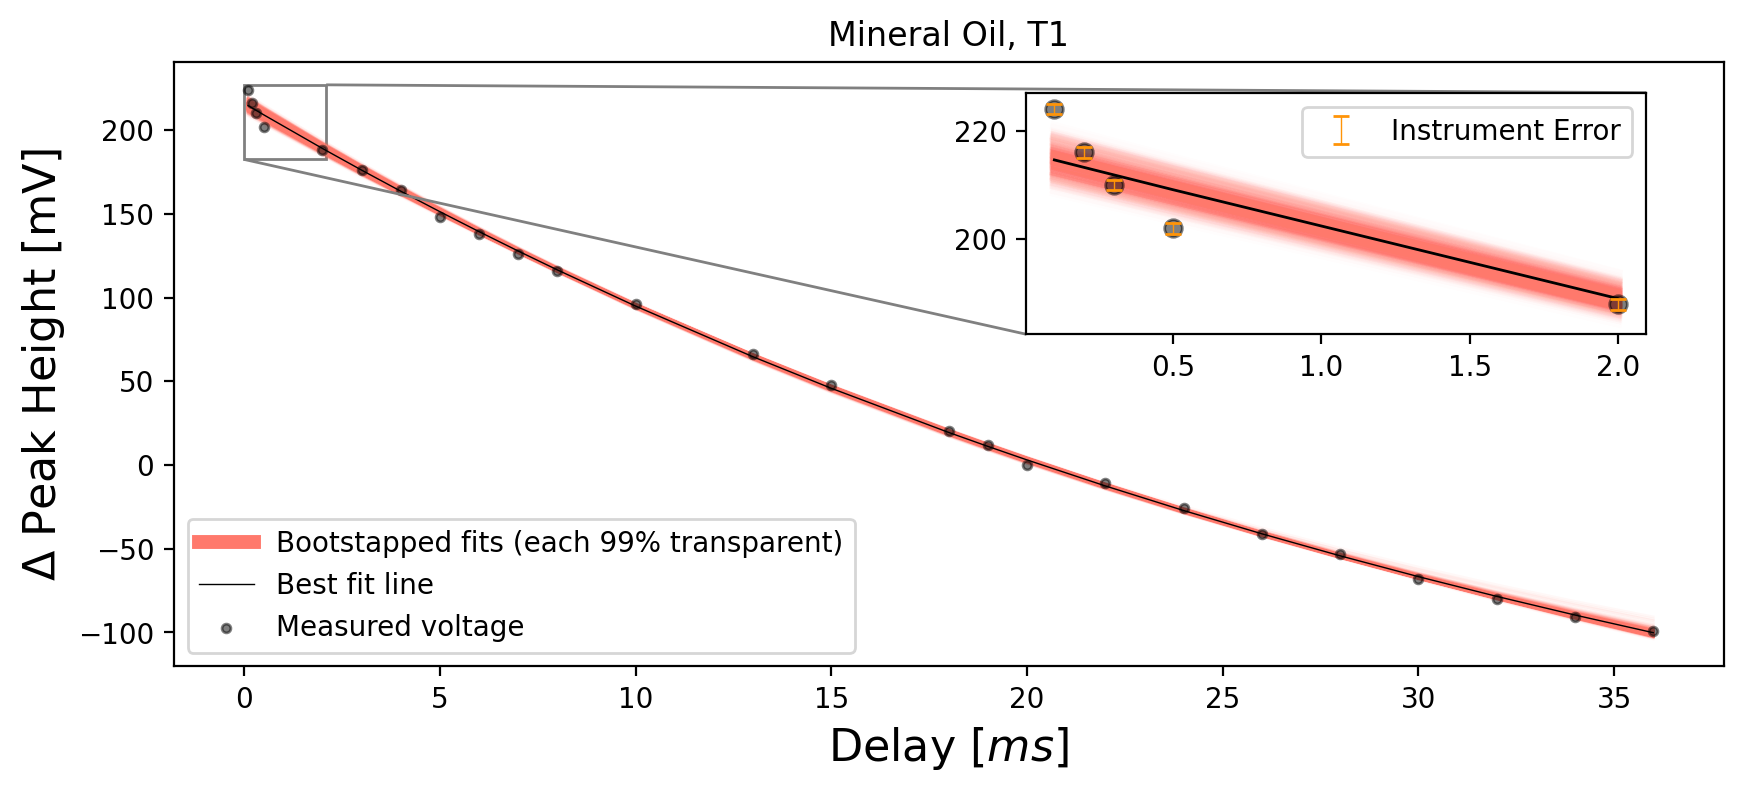

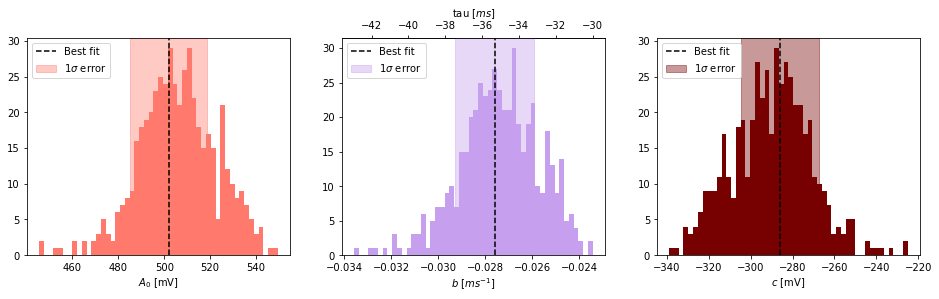

In [133]:
ys = np.array([224.0, 216.0, 210.0, 202.0, 188.0, 176.0, 164.0, 148.0, 138.0, 126.0, 116.0, 96.0, 66.0, 48.0, 20.0, 12.0, 0.0, 11.0, 26.0, 41.0, 53.0, 68.0, 80.0, 91.0, 99.0])
title = "Mineral Oil, T1"
y_errs = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
xs = np.array([100, 200, 300, 500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000, 13000, 15000, 18000, 19000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000, 36000])
Aguess, bguess, cguess = 530.9736531, 0.9999748861, 317

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [ 2.47763300e+02 -4.66827638e-02 -1.13383629e+02]
Data sigma error = 2.615659914250188
Bootstrapped 1 Sigma Error:[1.28599963e+01 4.86907494e-03 1.41085496e+01]
Tau = -21.421182455889756 ± 2.258831398206321
Tau = -21.421182455889756 ± 2.2342580907901417


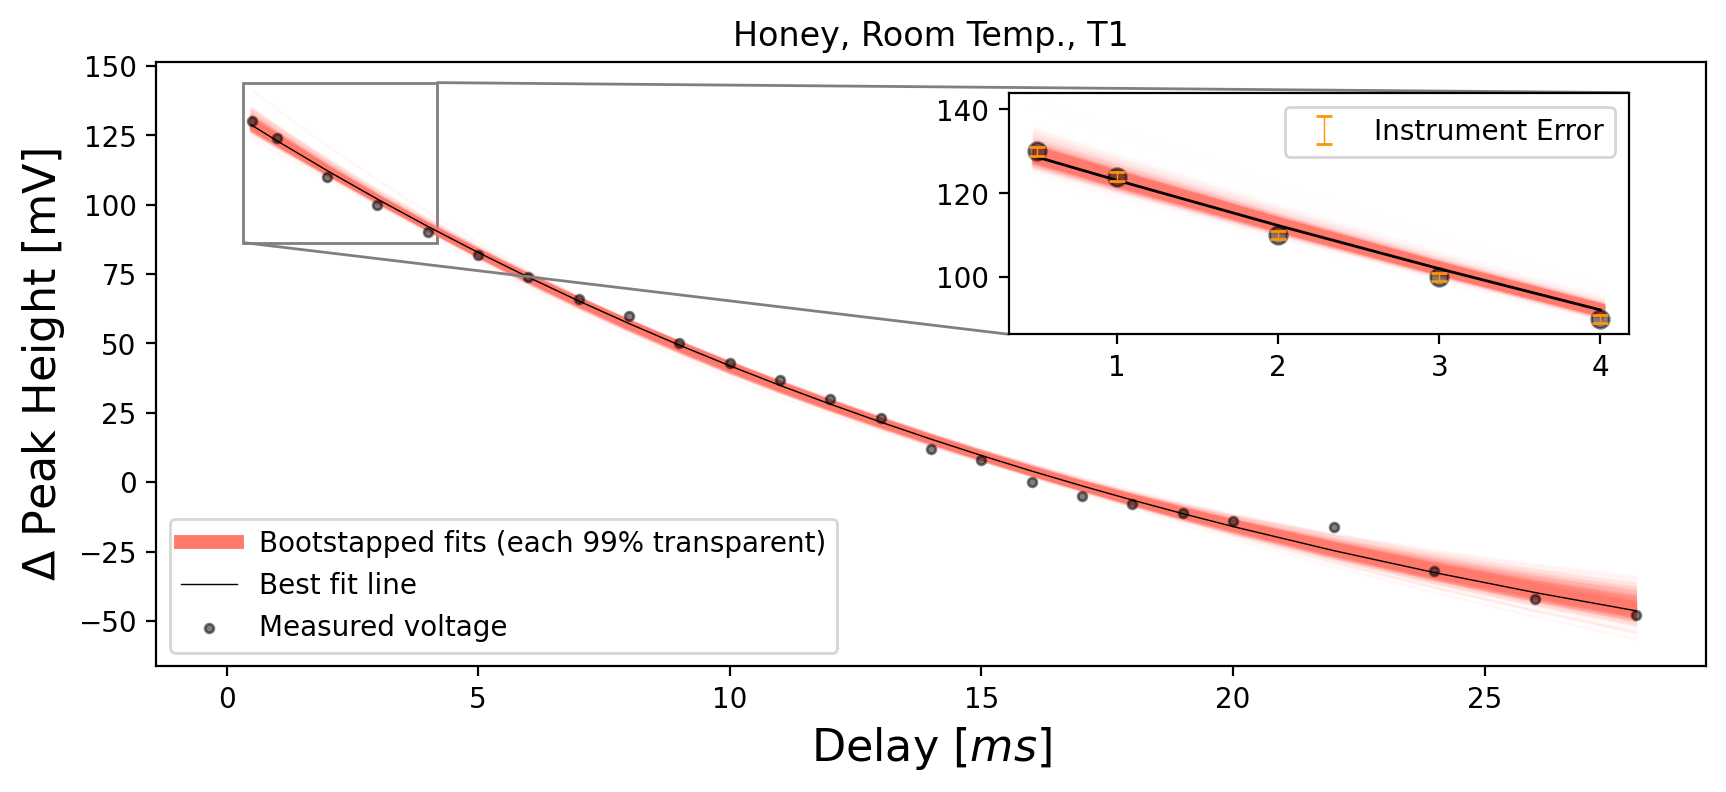

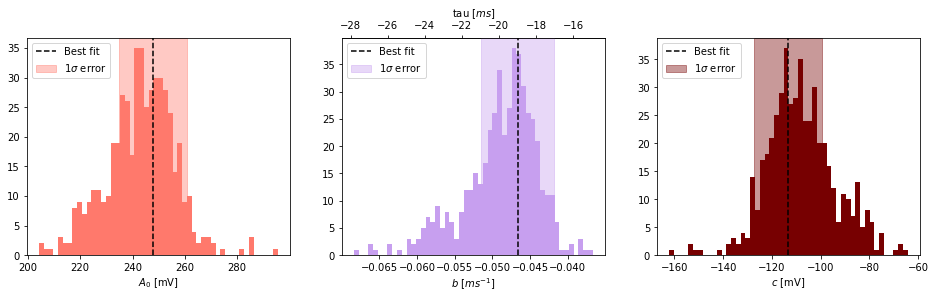

In [134]:
title = "Honey, Room Temp., T1"
ys = [130, 124, 110, 100, 90, 82, 74, 66, 60, 50, 43, 37, 30, 23, 12, 8, 0, 5, 8, 11, 14, 16, 32, 42, 48]
y_errs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
xs = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 22000, 24000, 26000, 28000]

decay_plots(xs,ys,y_errs,title,254.1574125,0.9999561053,121.5)

Data pfit = [ 8.42730888e+02 -8.39283292e-02 -4.29176087e+02]
Data sigma error = 2.092874838499263
Bootstrapped 1 Sigma Error:[3.68198578e+00 9.95947519e-04 4.63380711e+00]
Tau = -11.914927999475028 ± 0.1414101096231673
Tau = -11.914927999475028 ± 0.1413901966452864


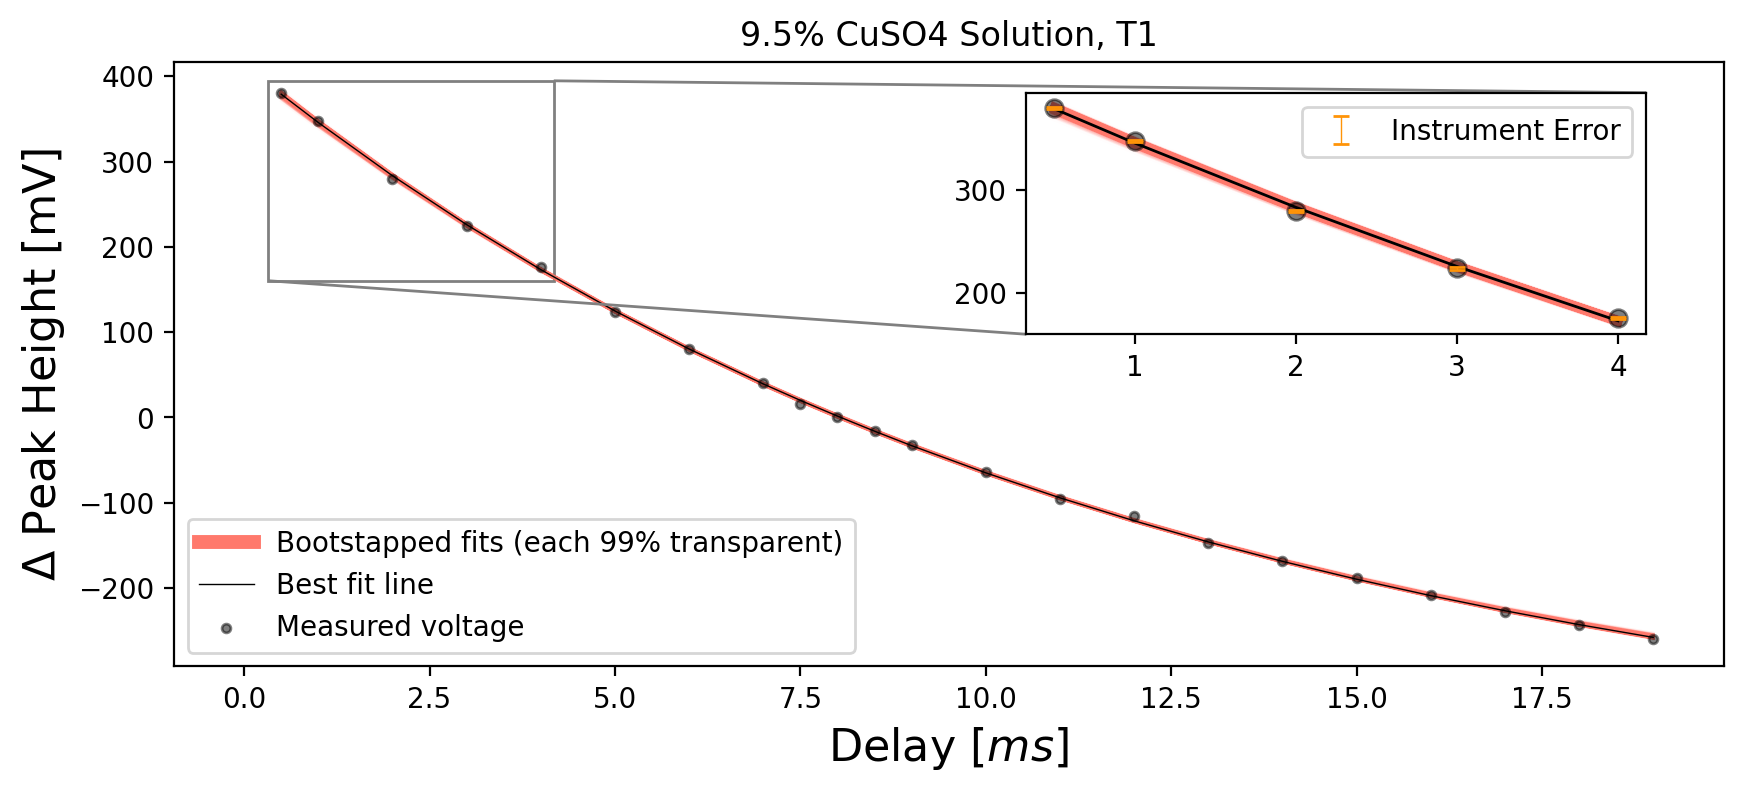

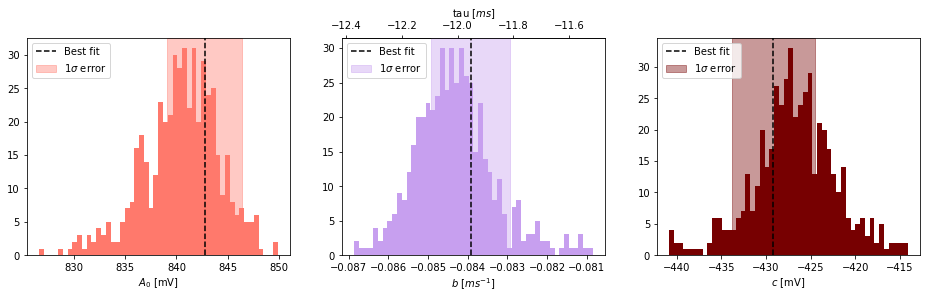

In [135]:
title = "9.5% CuSO4 Solution, T1"
ys = [380.0, 348.0, 280.0, 224.0, 176.0, 124.0, 80.0, 40.0, 16.0, 0.0, 16.0, 32.0, 64.0, 96.0, 116, 148, 168, 188, 208, 228, 244, 260]
y_errs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
xs = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 7500, 8000, 8500, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]
Aguess, bguess, cguess = 849.5236965,0.9999184876,-40

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [ 4.58956545e+02 -1.82111495e-01 -5.09666207e+00]
Data sigma error = 2.4516203720909524
Bootstrapped 1 Sigma Error:[4.66412666 0.00668069 6.03958257]
Tau = -5.491141558790685 ± 0.2017117477584662
Tau = -5.491141558790685 ± 0.2014402922876081


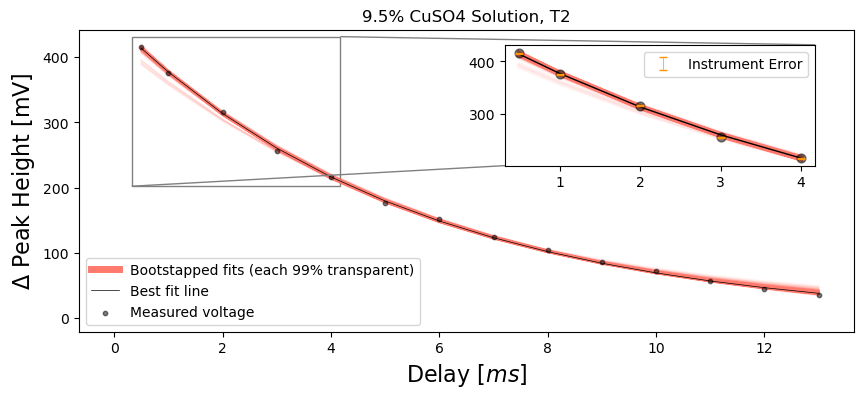

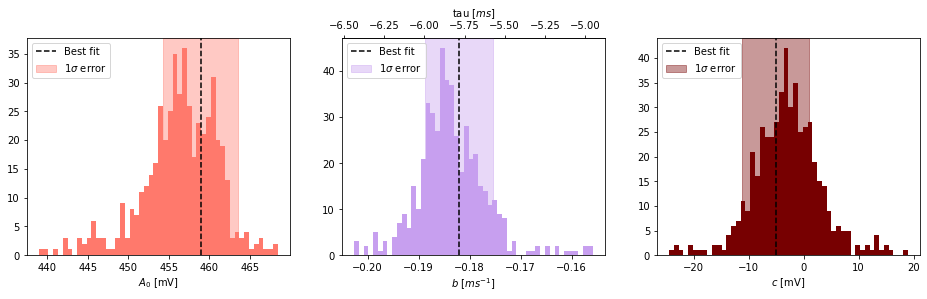

In [120]:
title = "9.5% CuSO4 Solution, T2"
ys = [416.0, 376.0, 316.0, 256.0, 216.0, 176.0, 152.0, 124.0, 104.0, 86.0, 72.0, 56.0, 44.0, 36.0]
y_errs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
xs = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000]
Aguess, bguess, cguess = 465.2886241,0.9998094374,-1

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [ 3.35172801e+02 -3.00267811e+00  5.60800227e-02]
Data sigma error = 1.7209334188181489
Bootstrapped 1 Sigma Error:[7.23960464 0.05340514 0.32777084]
Tau = -0.3330360307813777 ± 0.005925198859624206
Tau = -0.3330360307813777 ± 0.005923324505964153


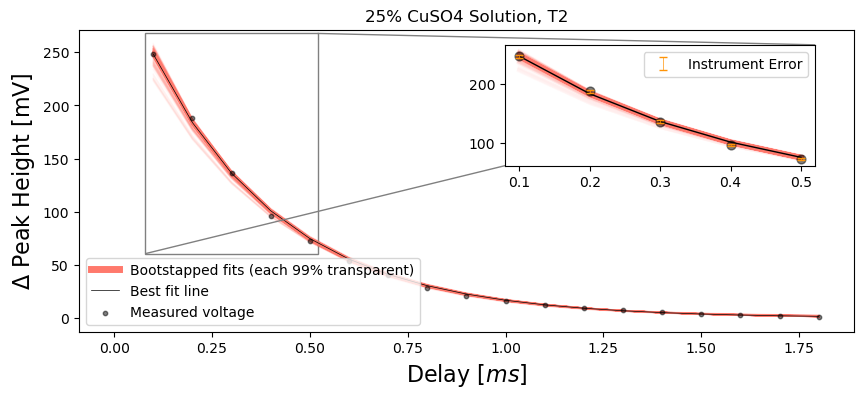

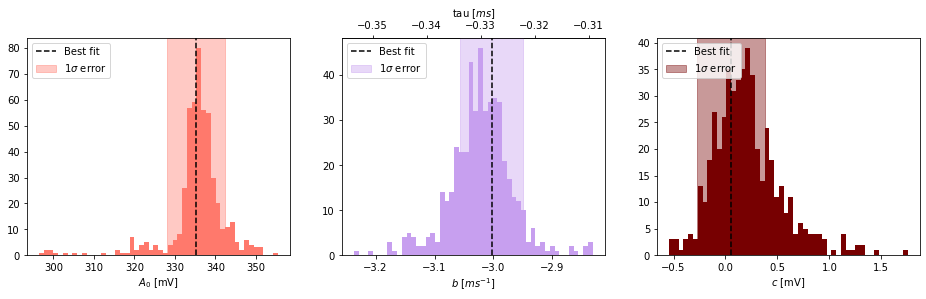

In [121]:
title = "25% CuSO4 Solution, T2"
ys = [248, 188, 136, 96, 72, 54, 40, 28, 21, 16, 12, 9.2, 7.2, 5.2, 4, 2.6, 1.8, 1.4]
y_errs = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
xs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]
Aguess, bguess, cguess = 331.4632652,0.9969905217,0

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [ 400.21558293   -1.72904342 -169.19241288]
Data sigma error = 1.8480220637316285
Bootstrapped 1 Sigma Error:[7.63121193 0.06258736 8.59967183]
Tau = -0.5783544750703608 ± 0.02096255550378993
Tau = -0.5783544750703608 ± 0.02093508885704492


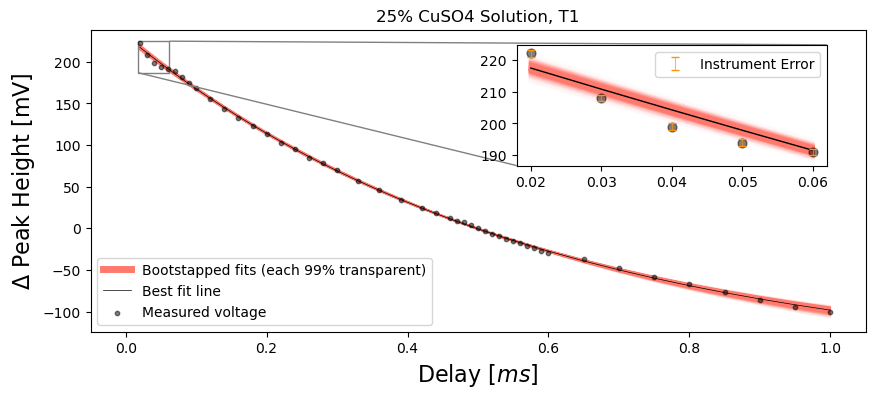

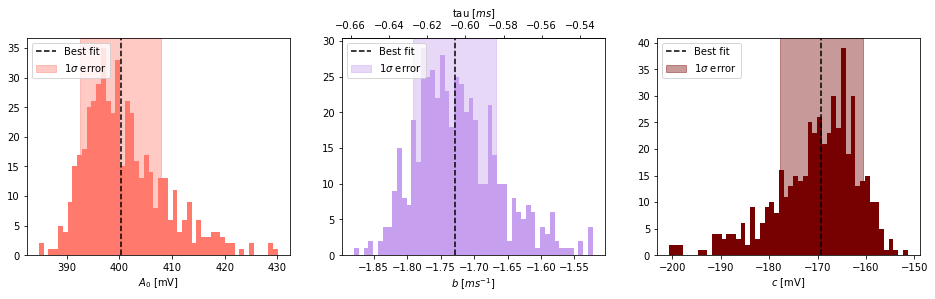

In [122]:
title = "25% CuSO4 Solution, T1"
ys = [222, 208, 199, 194, 191, 189, 182, 175, 169, 155, 143, 133, 123, 113, 103, 95, 85, 78, 70, 57, 46, 34.4, 24.4, 18.4, 12.4, 8.8, 7.2, 3.6, 0, 3.6, 6.4, 8.8, 13.2, 15.6, 17.6, 21.2, 23.5, 26.8, 30, 37.2, 47.2, 58, 67, 77, 86, 94, 100]
y_errs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 1, 1, 1, 1, 1]
xs = [20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 330, 360, 390, 420, 440, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
Aguess, bguess, cguess = 401.8151957,0.9982848889,-40

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [ 2.66477601e+02 -6.84926074e-02 -1.29377198e+02]
Data sigma error = 2.6365387357379637
Bootstrapped 1 Sigma Error:[1.25417171e+01 5.89588532e-03 1.31811739e+01]
Tau = -14.600115806676826 ± 1.2661690008287514
Tau = -14.600115806676826 ± 1.256786851682981


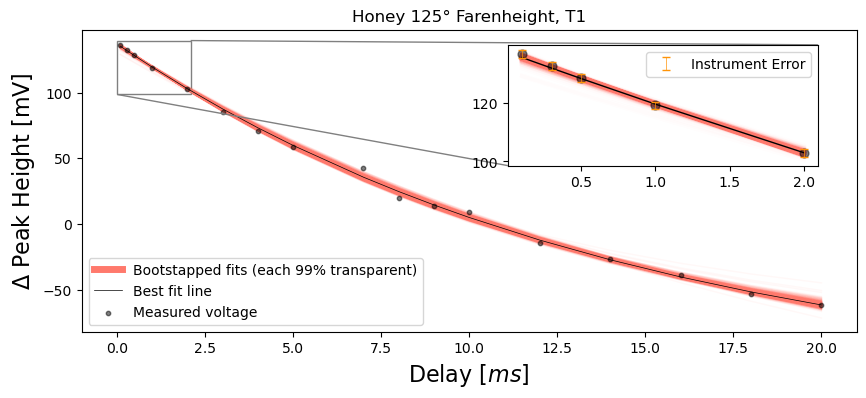

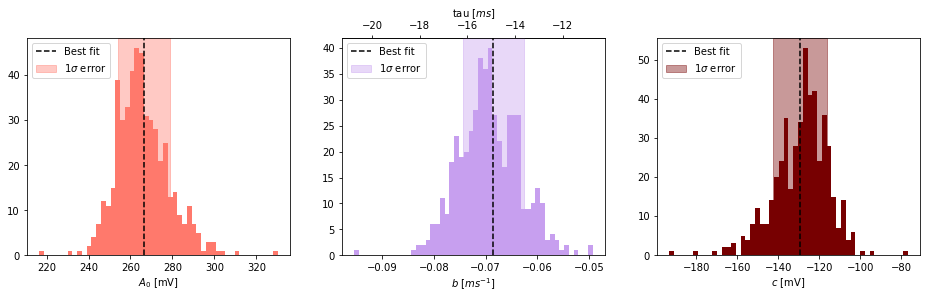

In [123]:
title = r"Honey 125° Farenheight, T1"
ys = [136.4023669, 132.3905325, 128.3786982, 119.0177515, 102.9704142, 85.58579882, 70.87573964, 58.84023669, 42.79289941, 20.0591716, 13.37278107, 9.360946746, -14.71005917, -26.74556213, -38.78106509, -53.49112426, -61.5147929]
y_errs = [1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33]
xs = [100, 300, 500, 1000, 2000, 3000, 4000, 5000, 7000, 8000, 9000, 10000, 12000, 14000, 16000, 18000, 20000]
Aguess, bguess, cguess = 268.7376652,0.9999327447,0

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [ 5.39409032e+02 -5.24264177e-01 -2.61825415e+01]
Data sigma error = 7.020270824094977
Bootstrapped 1 Sigma Error:[16.18257058  0.03901421 13.17875281]
Tau = -1.9074353055234798 ± 0.1427362370876698
Tau = -1.9074353055234798 ± 0.1419457776907294


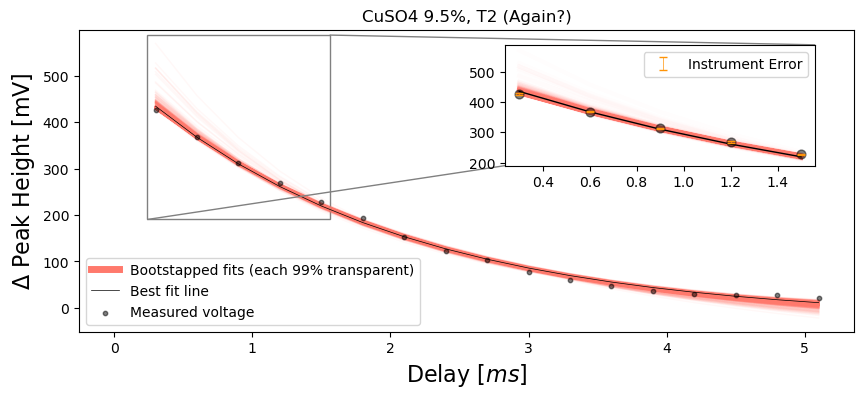

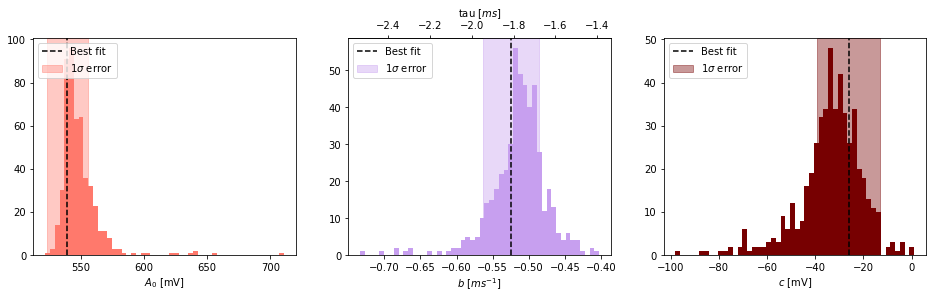

In [124]:
title = "CuSO4 9.5%, T2 (Again?)"
ys = [426.4615385, 368.3076923, 312.9230769, 268.6153846, 227.0769231, 193.8461538, 152.3076923, 121.8461538, 102.4615385, 77.53846154, 60.92307692, 47.07692308, 36, 30.46153846, 27.69230769, 27.69230769, 22.15384615]
y_errs = [2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78, 2.78]
xs = [300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800, 5100]
Aguess, bguess, cguess = 537.0239924,0.9994182484,0

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [45.23919871 -1.21553173 -0.11409226]
Data sigma error = 0.2535370192466557
Bootstrapped 1 Sigma Error:[6.76734739 0.22207529 1.16493594]
Tau = -0.8226852306714204 ± 0.15549313789339167
Tau = -0.8226852306714204 ± 0.15030299745001074


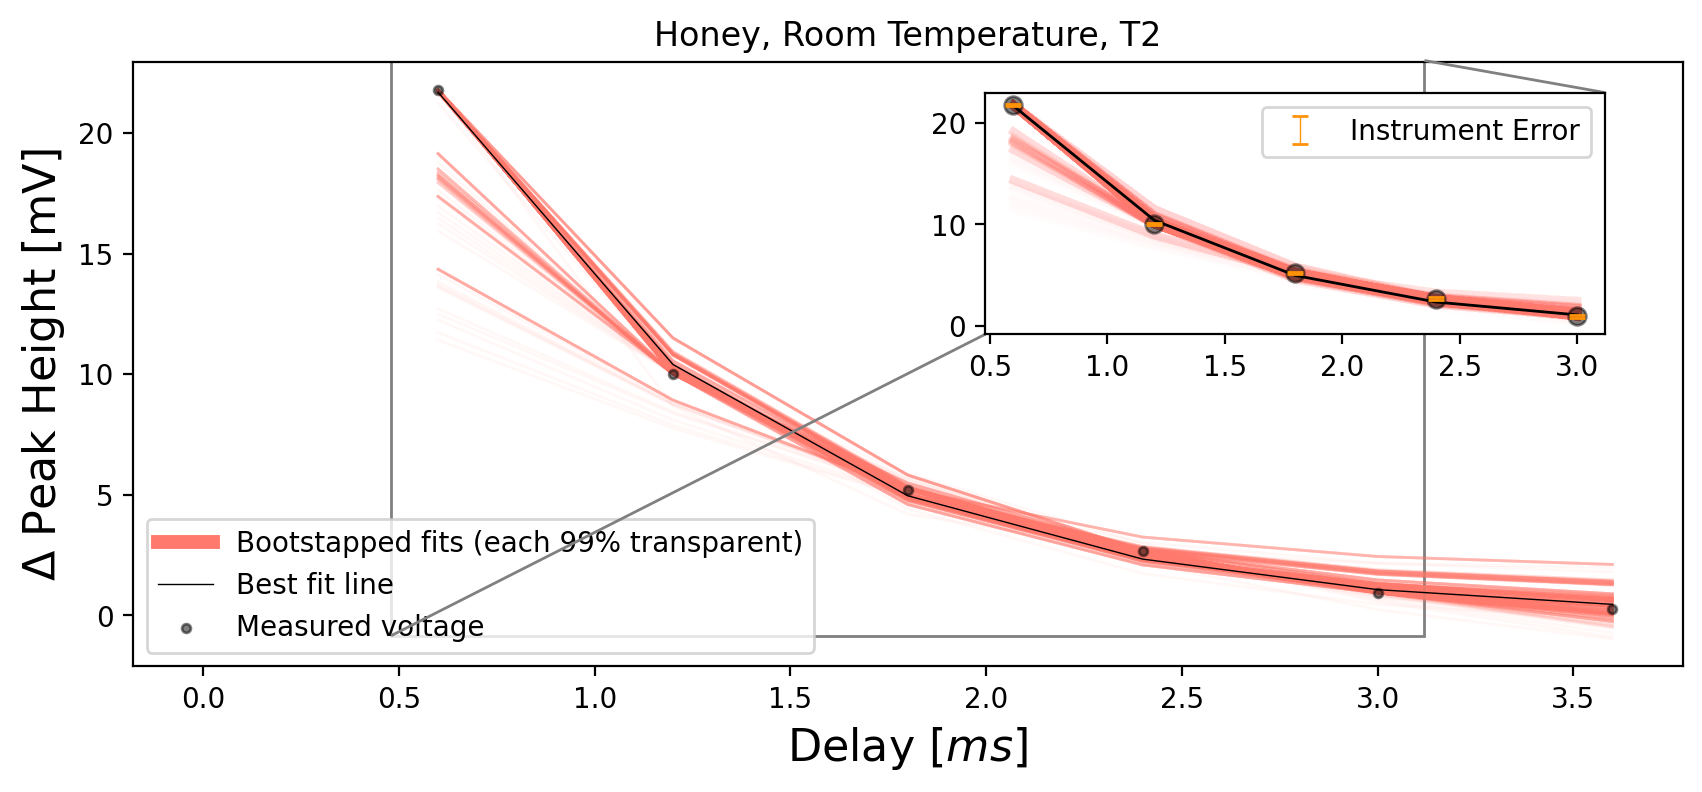

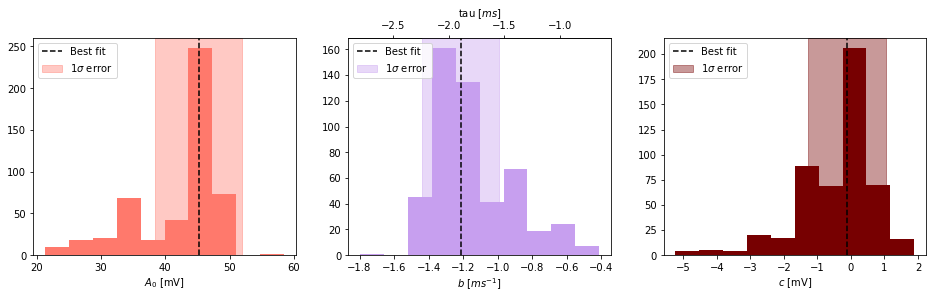

In [139]:
title = "Honey, Room Temperature, T2"
ys = [21.79763314, 10.0295858, 5.215384615, 2.674556213, 0.9360946746, 0.2674556213]
y_errs = [0.134, 0.134, 0.134, 0.134, 0.134, 0.134]
xs = [600, 1200, 1800, 2400, 3000, 3600]
Aguess, bguess, cguess = 41.89462115,0.9989011333,0.0

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [ 1.81043492e+02 -1.33152962e-01 -3.12932322e+01]
Data sigma error = 0.659855520242274
Bootstrapped 1 Sigma Error:[3.23775184 0.00517044 3.9245643 ]
Tau = -7.510159644032477 ± 0.2920663673119197
Tau = -7.510159644032477 ± 0.2916259791551692


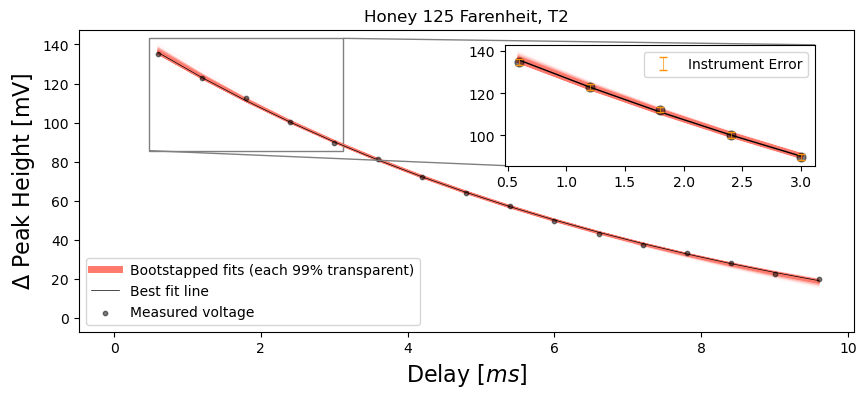

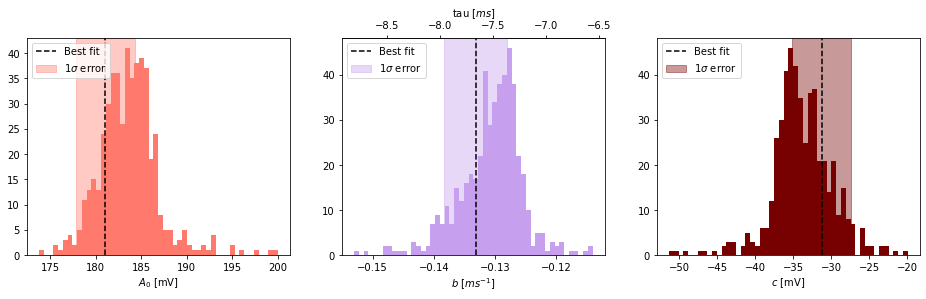

In [126]:
title = "Honey 125 Farenheit, T2"
ys = [135.0650888, 123.0295858, 112.3313609, 100.295858, 89.59763314, 81.5739645, 72.21301775, 64.18934911, 57.50295858, 49.47928994, 42.79289941, 37.44378698, 33.43195266, 28.08284024, 22.73372781, 20.0591716]
y_errs = [1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34]
xs = [600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600]
Aguess, bguess, cguess = 178.5715842,0.9998618777,0.0

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)

Data pfit = [ 2.43690458e+02 -6.65568432e-02 -5.58988508e+01]
Data sigma error = 2.8359290603239535
Bootstrapped 1 Sigma Error:[4.76469927e+01 1.09157080e-02 5.03803927e+01]
Tau = -15.024751043602869 ± 2.5322586786660555
Tau = -15.024751043602869 ± 2.464146236134273


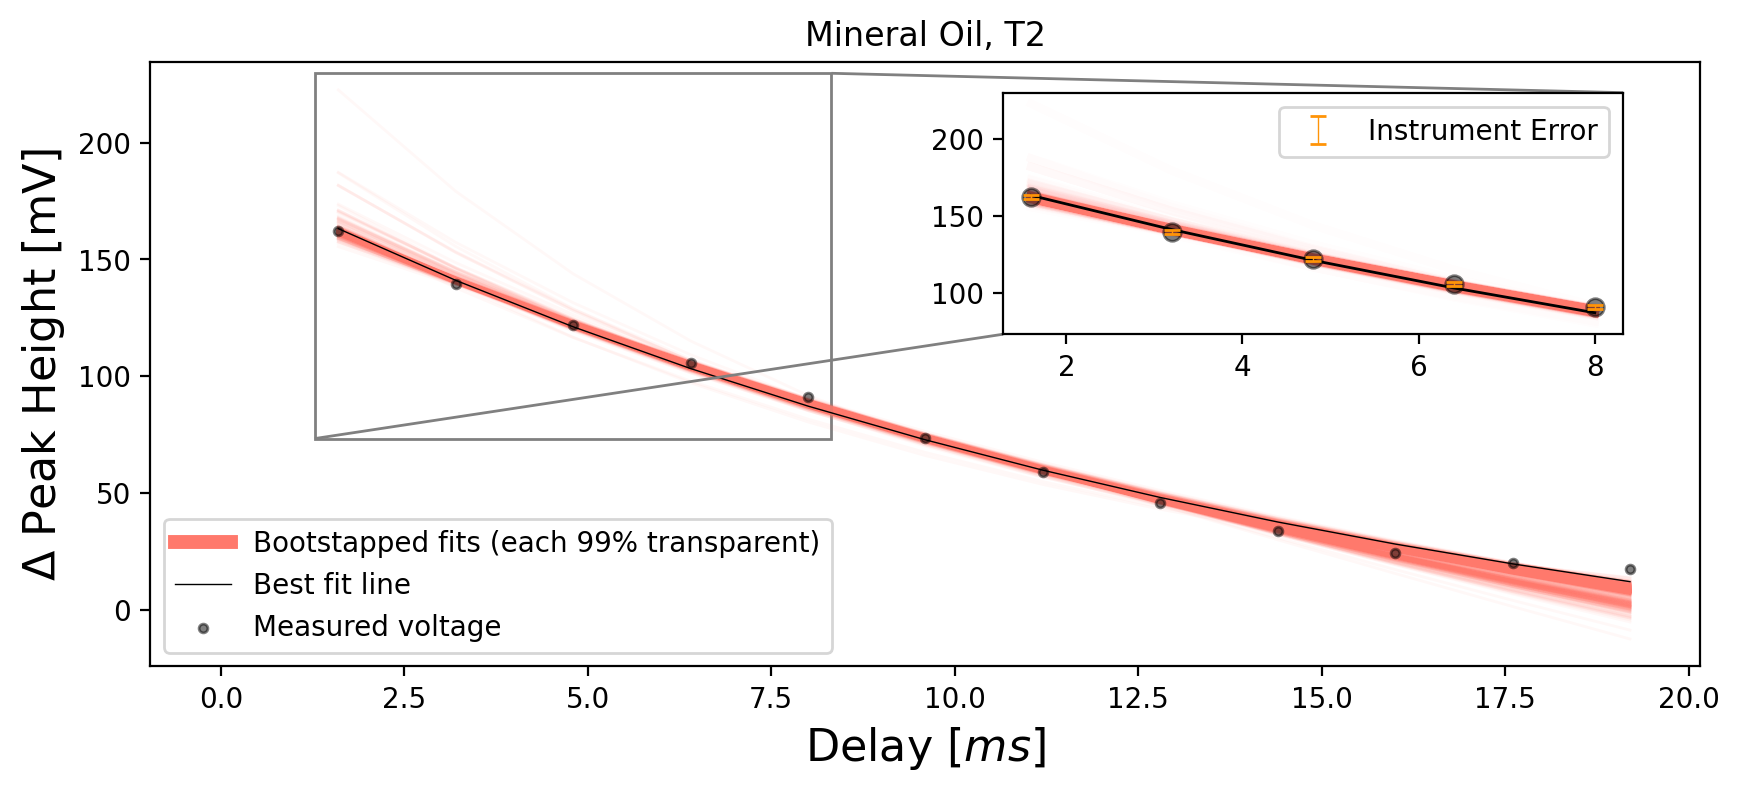

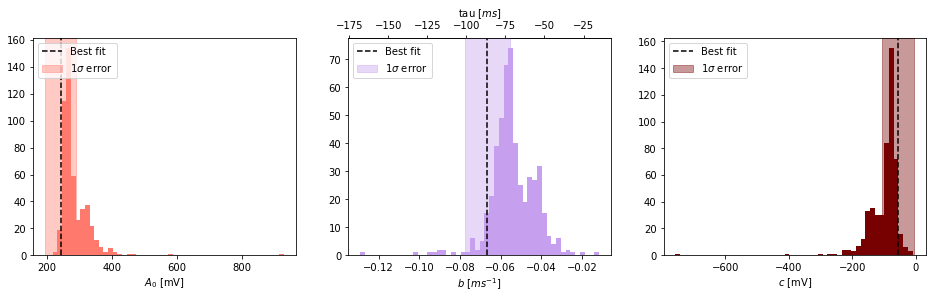

In [136]:
title = "Mineral Oil, T2"
ys = [162.1165049, 139.3398058, 121.9223301, 105.8446602, 91.10679612, 73.68932039, 58.95145631, 45.55339806, 33.49514563, 24.11650485, 20.09708738, 17.41747573]
y_errs = [1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34, 1.34]
xs = [1600, 3200, 4800, 6400, 8000, 9600, 11200, 12800, 14400, 16000, 17600, 19200]
Aguess, bguess, cguess = 232.8455806,0.999924242,0.0

decay_plots(xs, ys, y_errs, title, Aguess, bguess, cguess)